In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 1. Load the dataset and make your preprocessing like normalizing the data.

In [5]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [37]:
target_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

In [27]:
X = pd.DataFrame(mnist['data'])
y = pd.Series(mnist['target'])
X = X.sample(10000, random_state=36)
y = y.iloc[X.index]
X = X.reset_index(drop=True)
y = y.astype(int).reset_index(drop=True)
y = y.replace(target_dict)
display(
    X,
    y
)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,74.0,...,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,136.0,184.0,67.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,68.0,35.0,39.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0       3
1       0
2       5
3       9
4       4
       ..
9995    5
9996    7
9997    3
9998    7
9999    9
Length: 10000, dtype: int32

In [16]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
display(scaled_X)

array([[-0.01068767, -0.01829679, -0.02215334, ..., -0.16057962,
        -0.09676986, -0.03951549],
       [-0.01068767, -0.01829679, -0.02215334, ..., -0.16057962,
        -0.09676986, -0.03951549],
       [-0.01068767, -0.01829679, -0.02215334, ..., -0.16057962,
        -0.09676986, -0.03951549],
       ...,
       [-0.01068767, -0.01829679, -0.02215334, ..., -0.16057962,
        -0.09676986, -0.03951549],
       [-0.01068767, -0.01829679, -0.02215334, ..., -0.16057962,
        -0.09676986, -0.03951549],
       [-0.01068767, -0.01829679, -0.02215334, ..., -0.16057962,
        -0.09676986, -0.03951549]])

In [19]:
pca_model = PCA(n_components=2)
pca_X = pca_model.fit_transform(scaled_X)
pca_X

array([[  8.88443567, -10.41472719],
       [ 17.91407008,  -6.82906375],
       [-21.86121067,  -6.33860291],
       ...,
       [ -3.19865535, -13.16407169],
       [-17.26087285,   0.31142426],
       [  2.10982187,  18.63046526]])

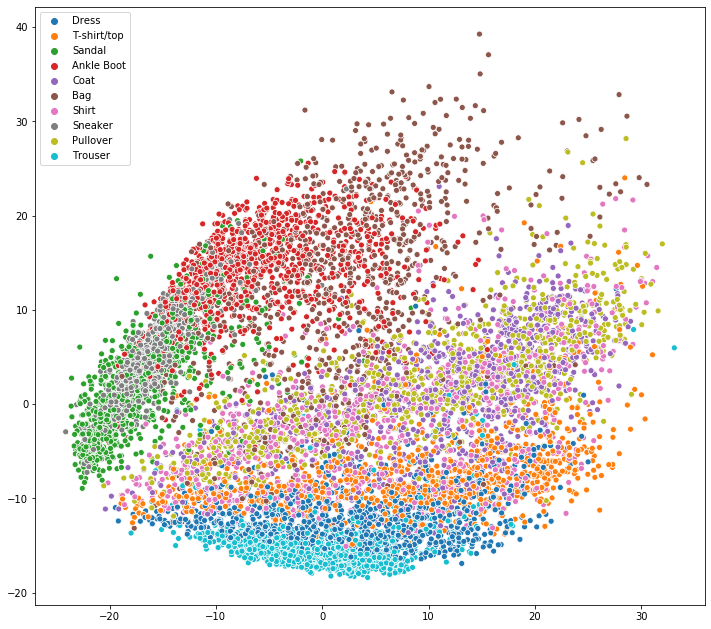

In [41]:
plt.figure(figsize=(12, 11))
sns.scatterplot(pca_X[:, 0], pca_X[:, 1], hue=y, legend='full')
plt.show()

No, there is still a significant amout of overlap despite seeing multiple slightly segregated clusters